In [5]:
from qiskit.circuit.library import QuantumVolume, EfficientSU2, TwoLocal, QFT
from qiskit import QuantumCircuit
from qiskit.circuit.library.standard_gates import iSwapGate, CXGate
from qiskit import QuantumCircuit
from qiskit.providers.fake_provider import FakeQuitoV2
from qiskit.transpiler.coupling import CouplingMap
from qiskit.extensions import UnitaryGate
from weylchamber import canonical_gate
from mirror_gates.pass_managers import Mirage, QiskitLevel3
from transpile_benchy.metrics.gate_counts import (
    DepthMetric,
    TotalMetric,
    TotalSwaps,
)
from transpile_benchy.metrics.timer import TimeMetric
from mirror_gates.fast_unitary import FastConsolidateBlocks
from qiskit.transpiler.passes import (
    Collect2qBlocks,
    Unroll3qOrMore,
    ConsolidateBlocks,
)
from qiskit.transpiler import PassManager
import numpy as np
from mirror_gates.logging import transpile_benchy_logger

Loading seca_n11 from QASMBench


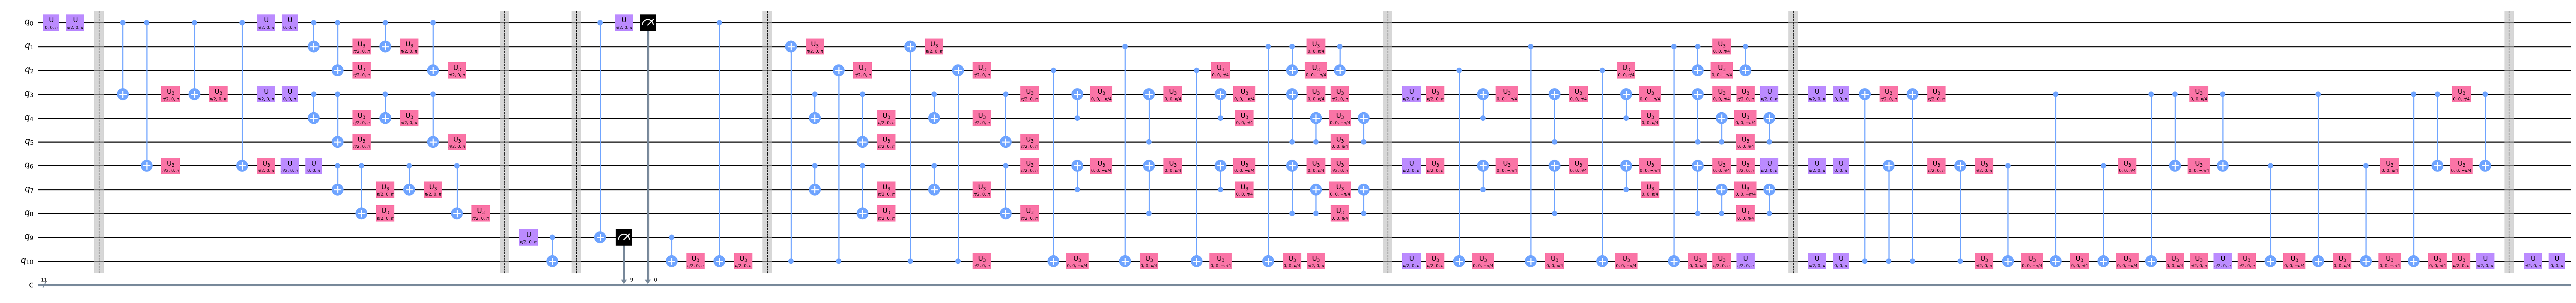

In [6]:
from transpile_benchy.interfaces.mqt_interface import MQTBench
from transpile_benchy.interfaces.qasm_interface import QASMBench
from transpile_benchy.library import CircuitLibrary

lib = CircuitLibrary.from_txt("../circuits/medium_circuits.txt")
qc = lib.get_circuit("seca_n11")
# lib = CircuitLibrary(circuit_list=["qft_n4"])
# qc = lib.get_circuit("qft_n4")
qc = qc.decompose()
qc = qc.decompose()
qc = qc.decompose()
qc.remove_final_measurements()
display(qc.draw("mpl", fold=-1))

In [7]:
# from qiskit.quantum_info import Operator
# from qiskit import QuantumCircuit
# import numpy as np
# from qutip import Qobj

# circ = QuantumCircuit(2)
# circ.cx(1, 0)
# circ.u(0, 0, -np.pi / 4, 0)
# circ.cx(1, 0)

# from weylchamber import c1c2c3

# print(c1c2c3(Operator(circ).data))
# Qobj(Operator(circ).data)

In [8]:
from mirror_gates.fast_unitary import FastConsolidateBlocks
from qiskit.transpiler.passes import (
    ConsolidateBlocks,
    Collect2qBlocks,
    RemoveBarriers,
    RemoveFinalMeasurements,
)
from mirror_gates.utilities import RemoveAllMeasurements
from qiskit.transpiler import PassManager
from qiskit.quantum_info import Operator
from weylchamber import c1c2c3

for circuit_name in lib.circuit_list:
    if circuit_name == "portfolioqaoa_n16":
        continue

    # if circuit_name != "qpeexact_16":
    #     continue

    print("\n")
    qc = lib.get_circuit(circuit_name)
    qc = qc.decompose().decompose().decompose()
    qc.remove_final_measurements()

    list1 = []
    pm0 = PassManager()
    pm0.append(RemoveBarriers())
    pm0.append(RemoveAllMeasurements())
    pm0.append(Collect2qBlocks())
    pm0.append(ConsolidateBlocks(force_consolidate=True))
    qc0 = pm0.run(qc)
    for gate in qc0:
        if gate.operation.name not in ["barrier"]:
            # print(gate.operation)\
            corrd = c1c2c3(gate.operation.to_matrix())
            list1.append(corrd)
            # print(corrd)

    print("\n")
    list2 = []
    pm1 = PassManager()
    pm1.append(RemoveBarriers())
    pm1.append(RemoveAllMeasurements())
    pm1.append(FastConsolidateBlocks())
    qc1 = pm1.run(qc)
    for gate in qc1:
        if gate.operation.name not in ["barrier"]:
            # print(gate.operation)
            corrd = c1c2c3(gate.operation.to_matrix())
            list2.append(corrd)
            # print(corrd)

    # compare the two lists
    print(circuit_name)
    for x, y in zip(list1, list2):
        print(x, y)
    print("list1 == list2: ", list1 == list2)



Loading qec9xz_n17 from QASMBench


qec9xz_n17
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0.0, 0.0)
(0.5, 0.0, 0.0) (0.5, 0

ValueError: Gates must have a 4×4 shape